In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyxdf

%matplotlib inline

In [2]:
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run-002_eeg.xdf'
fpath = './results/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-test-120_run-003_eeg.xdf'
fpath = "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-004_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-007_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120-nogc_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-008_eeg.xdf'

fpath = "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
streams, header = pyxdf.load_xdf(fpath, dejitter_timestamps=False)

for stream in streams:
    print(stream['info']['name'])

['SequenceStream']
['PhaseMarkers']
['ScreenSensorStream']
['ScreenSequenceStream']


In [3]:
# Get sequence stream by name
sequence_stream = [s for s in streams if s['info']['name'][0] == 'SequenceStream'][0]
screen_sequence_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSequenceStream'][0]
sensor_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSensorStream'][0]
phase_stream = [s for s in streams if s['info']['name'][0] == 'PhaseMarkers'][0]

In [4]:
phase_stream['time_series']

[['WarmupStart'], ['WarmupEnd'], ['StartExperiment'], ['EndExperiment']]

In [5]:
exp_start_time = phase_stream['time_stamps'][2]
exp_start_time

np.float64(22872.10615252109)

## Sequence jitter

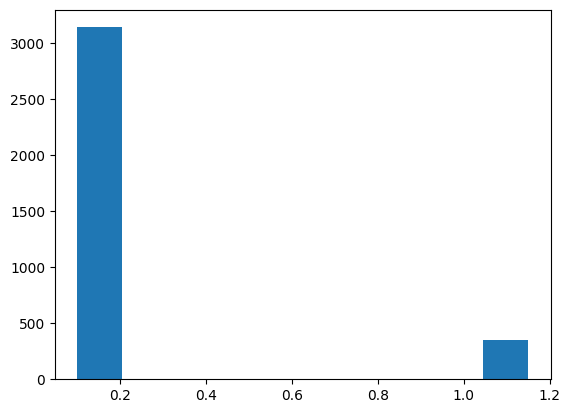

In [6]:
%matplotlib inline
timestamps = sequence_stream['time_stamps']
timeseries = sequence_stream['time_series']

# timestamps = timestamps[timestamps >= exp_start_time]
timestamps_diff = np.diff(timestamps)
plt.hist(timestamps_diff)
plt.show()
# Ignore wait times
timestamps_diff = timestamps_diff[timestamps_diff < 0.5]
timestamps_diff_ms = timestamps_diff * 1000

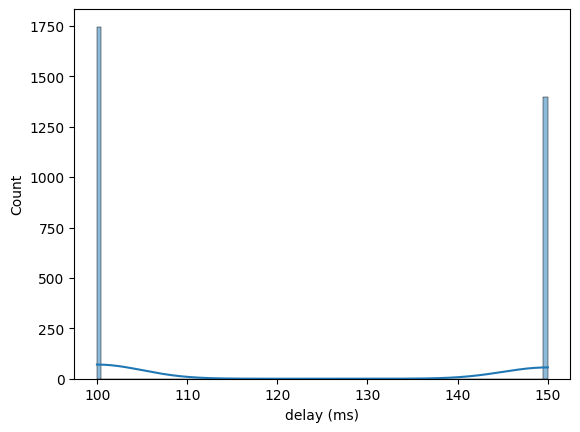

In [7]:
sns.histplot(x=timestamps_diff_ms, bins=100, kde=True)
plt.xlabel('delay (ms)')
plt.show()

In [8]:
np.unique(timestamps_diff_ms.round(), return_counts=True)

(array([100., 150.]), array([1746, 1396]))

In [9]:
# on_timestamps_diff = timestamps_diff[timestamps_diff < 0.13] - 0.1
# off_timestamps_diff = timestamps_diff[timestamps_diff > 0.13] - 0.15
# delays = np.concatenate((on_timestamps_diff, off_timestamps_diff))
# print(delays.shape)

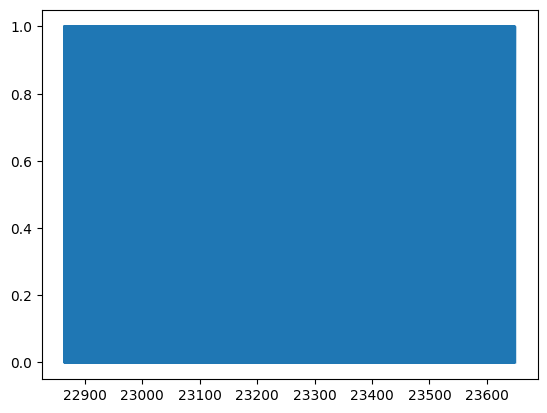

In [10]:
timestamps = sequence_stream['time_stamps']
timeseries = sequence_stream['time_series']
timeseries = timeseries[:, 0]
plt.plot(timestamps, timeseries)
plt.show()

# Sensor jitter

In [11]:
timestamps = sensor_stream['time_stamps']
timeseries = sensor_stream['time_series']
# # Get timestamps within sequence stream time range
timeseries = timeseries[timestamps >= exp_start_time]
timestamps = timestamps[timestamps >= exp_start_time]



In [12]:
%matplotlib inline

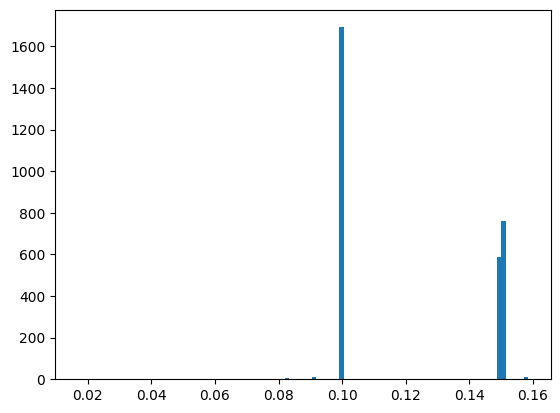

(array([ 17.,  83.,  92., 100., 108., 133., 142., 150., 158., 159.]), array([   1,    4,    9, 1692,    2,    1,    1, 1350,   10,    3]))


In [13]:
%matplotlib inline
timestamps_diff = np.diff(timestamps)
# timestamps_diff_cut = timestamps_diff[(timestamps_diff < 0.3) & (timestamps_diff > 0.05)]
timestamps_diff_cut = timestamps_diff[timestamps_diff < 0.3]
plt.hist(timestamps_diff_cut, bins=100)
plt.show()
timestamps_diff_cut_ms = timestamps_diff_cut * 1000
print(np.unique(timestamps_diff_cut_ms.round(0), return_counts=True))

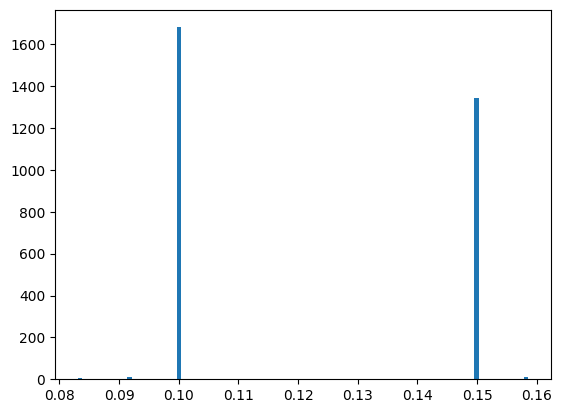

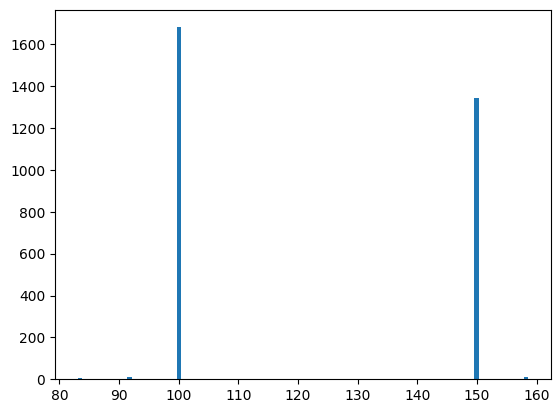

(array([ 83.,  92., 100., 108., 133., 142., 150., 158., 159.]), array([   4,    9, 1681,    2,    1,    1, 1342,   10,    3]))


In [14]:

# Ignore first 20 (warmup)
timestamps_diff = timestamps_diff_cut[20:]
plt.hist(timestamps_diff, bins=100)
plt.show()
timestamps_diff = timestamps_diff[timestamps_diff < 0.5]
timestamps_diff_ms = timestamps_diff * 1000
plt.hist(timestamps_diff_ms, bins=100)
plt.show()
print(np.unique(timestamps_diff_ms.round(0), return_counts=True))

In [15]:
np.unique((timestamps_diff * 1000).round())

array([ 83.,  92., 100., 108., 133., 142., 150., 158., 159.])

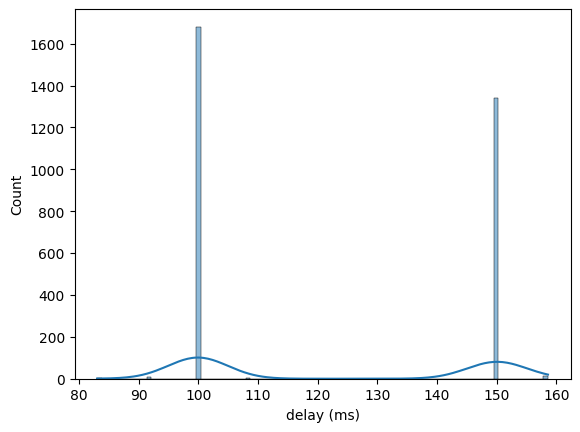

In [16]:
sns.histplot(x=timestamps_diff_ms, bins=100, kde=True)
plt.xlabel('delay (ms)')
plt.show()

In [17]:
np.unique((timestamps_diff * 1000).round())

array([ 83.,  92., 100., 108., 133., 142., 150., 158., 159.])

In [19]:
%matplotlib qt
timestamps = sequence_stream['time_stamps']
timeseries = sequence_stream['time_series']
timeseries = timeseries[:, 0]
timeseries = timeseries[timestamps >= exp_start_time]
timestamps = timestamps[timestamps >= exp_start_time]

timestamps_flip = screen_sequence_stream['time_stamps']
timeseries_flip = screen_sequence_stream['time_series']
timeseries_flip = timeseries_flip[timestamps_flip >= exp_start_time]
timestamps_flip = timestamps_flip[timestamps_flip >= exp_start_time]

timestamps_sensor = sensor_stream['time_stamps']
timeseries_sensor = sensor_stream['time_series']
timeseries_sensor = timeseries_sensor[timestamps_sensor >= exp_start_time]
timestamps_sensor = timestamps_sensor[timestamps_sensor >= exp_start_time]


plt.plot(timestamps, timeseries, label='lsl')
plt.plot(timestamps_sensor, timeseries_sensor, label='sensor')
plt.plot(timestamps_flip, timeseries_flip, label='flip')
plt.legend()
plt.show()

In [20]:
start_timestamp = 22874.821
end_timestamp = 23642
# start_timestamp = 5126
# end_timestamp = 5229

In [21]:
timeseries = timeseries[(timestamps > start_timestamp) & (timestamps < end_timestamp)]
timestamps = timestamps[(timestamps > start_timestamp) & (timestamps < end_timestamp)]

In [22]:
timeseries_sensor = timeseries_sensor[(timestamps_sensor > start_timestamp) & (timestamps_sensor < end_timestamp)]
timestamps_sensor = timestamps_sensor[(timestamps_sensor > start_timestamp) & (timestamps_sensor < end_timestamp)]

In [24]:
%matplotlib qt
plt.plot(timestamps, timeseries, label='lsl')
plt.plot(timestamps_sensor, timeseries_sensor, label='sensor')
plt.legend()
plt.show()

In [25]:
timestamps.shape

(3410,)

In [26]:
timestamps_sensor.shape

(3410,)

In [27]:
timestamps_diff = timestamps_sensor - timestamps
print(timestamps_diff.shape)
timestamps_diff_ms = timestamps_diff * 1000
print(timestamps_diff_ms.shape)

(3410,)
(3410,)


In [28]:
timestamps

array([22875.30510371, 22875.40510121, 22875.55510021, ...,
       23641.15718397, 23641.30718737, 23641.40718747], shape=(3410,))

In [29]:
timestamps_sensor

array([22875.32850043, 22875.42850583, 22875.57841953, ...,
       23641.17343013, 23641.32336043, 23641.42340523], shape=(3410,))

In [30]:
timestamps_sensor - timestamps

array([0.02339671, 0.02340461, 0.02331931, ..., 0.01624616, 0.01617306,
       0.01621776], shape=(3410,))

In [31]:
timestamps_diff_ms

array([23.39671261, 23.4046124 , 23.31931207, ..., 16.24616253,
       16.17306221, 16.21776199], shape=(3410,))

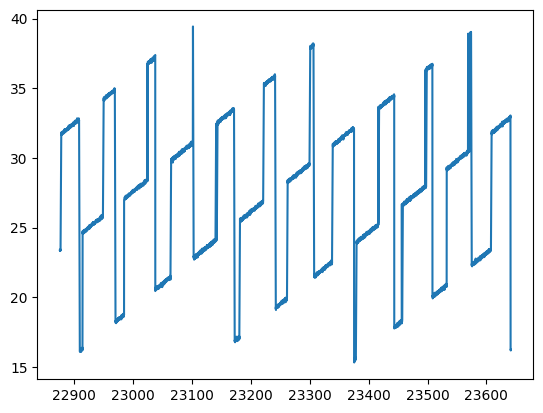

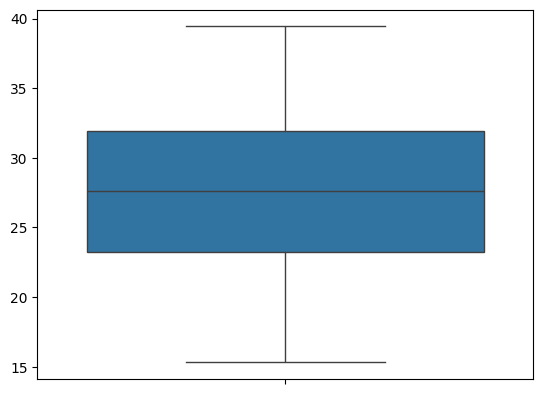

27.470730003860968
5.334459536500449


In [32]:
%matplotlib inline

plt.plot(timestamps, timestamps_diff_ms)
plt.show()

sns.boxplot(timestamps_diff_ms)
plt.show()
print(timestamps_diff_ms.mean())
print(timestamps_diff_ms.std())

<Axes: >

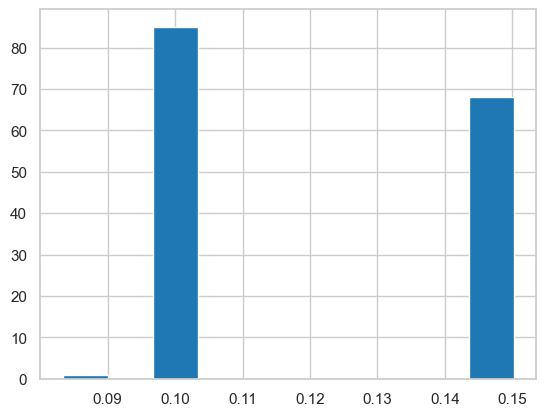

In [456]:
%matplotlib inline
timestamps = pd.read_csv('./flash_events_20250429_184734.csv')
timestamps_diff = timestamps['Timestamp (seconds)'].diff()
timestamps_diff = timestamps_diff[timestamps_diff < 0.3]
timestamps_diff = timestamps_diff[timestamps_diff > 0.05]
timestamps_diff.hist()

In [398]:
timestamps['Timestamp (seconds)'].diff().tolist()

[nan,
 0.015363100001195562,
 0.01690739999867219,
 0.03824160000112897,
 0.016608599999017315,
 0.01660520000041288,
 0.017157800000859424,
 0.017747799998687697,
 0.017198999999891385,
 0.016928500001085922,
 0.016932700000324985,
 0.016950100000030943,
 0.016983399998935056,
 0.016961200000878307,
 0.017017799998939154,
 0.016731900001104805,
 0.017181499999423977,
 0.016901999999390682,
 0.016964899999948102,
 0.016901900000448222,
 0.01698240000041551,
 0.01695110000036948,
 0.017019099999743048,
 0.016950100000030943,
 0.016661999999996624,
 0.01719020000018645,
 0.016951800000242656,
 0.016964299999017385,
 0.01695359999939683,
 0.016957499999989523,
 0.016959400001724134,
 0.01695369999833929,
 0.016955200000666082,
 0.01693379999960598,
 0.016971000000921777,
 0.017000899999402463,
 0.01690229999985604,
 0.017022899999574292,
 0.01689540000006673,
 0.016992700000628247,
 0.016905599999518017,
 0.01695060000020021,
 0.017159500001071137,
 0.016867599999386584,
 0.01687809999930

In [41]:
df = pd.read_csv('./flash_events_20250501_142253.csv')

In [46]:
df['Timestamp (seconds)']

0       10997.900258
1       10997.928292
2       10997.944668
3       10998.026064
4       10998.045860
            ...     
1621    11051.138332
1622    11052.288662
1623    11052.388685
1624    11052.538714
1625    11052.638742
Name: Timestamp (seconds), Length: 1626, dtype: float64